In [1]:
# read data file.pkl from dataset_merge folder
import os
import pandas as pd

# save path
save_path = os.path.join(os.getcwd(), 'dataset_merge')
# read the merged dataset
merged_df = pd.read_pickle(os.path.join(save_path, 'dataset_merge.pkl'))

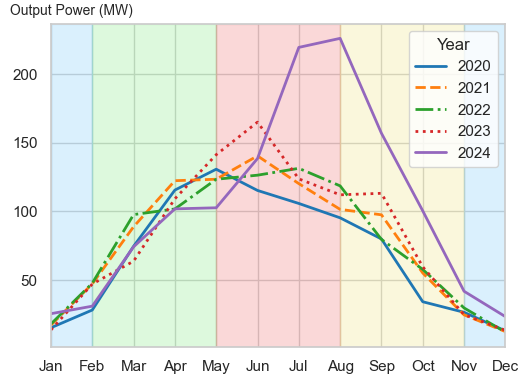

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the range of years to plot
selected_years = list(range(2020, 2025))

month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Create a pivot table with years as columns and months as rows
merged_df['Year'] = merged_df['DateTime'].dt.year
merged_df['Month'] = merged_df['DateTime'].dt.month
pivot_data = merged_df.pivot_table(index='Month', columns='Year', values='Real_Time_Measurement_MW', aggfunc='mean')

# Filter the pivot_data to include only the selected years
filtered_data = pivot_data[selected_years]

# Define line styles
line_styles = ['-', '--', '-.', ':']

# Define a larger set of unique colors to avoid repetition
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']

# Step 3: Plot the datฟ
plt.figure(figsize=(5.5, 4))
sns.set(style="whitegrid")

# Loop through each year and plot the monthly data with custom colors and line styles
for i, (year, style) in enumerate(zip(filtered_data.columns, line_styles * (len(filtered_data.columns) // len(line_styles) + 1))):
    plt.plot(
        filtered_data.index, 
        filtered_data[year], 
        label=str(year), 
        color=custom_colors[i % len(custom_colors)],  # Cycle through unique colors
        linestyle=style, 
        linewidth=2
    )

# Customize the plot
# plt.xlabel("Month", fontsize=14)
plt.ylabel("Output Power (MW)", fontsize=10,rotation=0,loc='top')
plt.xticks(ticks=range(1, 13), labels=month)
plt.xlim(1, 12)
plt.legend(title="Year", loc="upper right")

ax = plt.gca()  # Get the current Axes
ax.yaxis.set_label_coords(0.18, 1.02)

# Add normal background color for each season
plt.axvspan(2, 5, color='lightgreen', alpha=0.3, label='Spring')   # Green
plt.axvspan(5, 8, color='lightcoral', alpha=0.3, label='Summer')  # Red
plt.axvspan(8, 11, color='khaki', alpha=0.3, label='Autumn')      # Yellow
plt.axvspan(1, 2, color='lightskyblue', alpha=0.3, label='Winter')  # Blue
plt.axvspan(11, 12, color='lightskyblue', alpha=0.3)              # Continue Winter to December

# Adjust layout and show the plot
plt.tight_layout()
plt.show()
